In [136]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df = pd.read_csv('data/Training Set Values.csv')

df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [6]:
df['scheme_name']

0                              Roman
1                                NaN
2        Nyumba ya mungu pipe scheme
3                                NaN
4                                NaN
                    ...             
59395         Losaa Kia water supply
59396    Ikondo electrical water sch
59397                            NaN
59398                            NaN
59399                            NaN
Name: scheme_name, Length: 59400, dtype: object

In [7]:
df2 = pd.read_csv('data/Training Set Labels.csv')

df2.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [182]:
df2.value_counts()

id     status_group           
74247  non functional             1
24713  functional                 1
24727  functional                 1
24726  functional                 1
24725  functional                 1
                                 ..
49474  functional needs repair    1
49473  functional                 1
49471  functional needs repair    1
49469  non functional             1
0      non functional             1
Length: 59400, dtype: int64

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [9]:
df = pd.concat([df,df2], axis=1, )

In [10]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [12]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [193]:
df3 = df2.copy()

df3['status_group'] = df3['status_group'].map({'functional':'functional', 'non functional':'non functional','functional needs repair':'functional'})

df3['status_group'].value_counts().index

Index(['functional', 'non functional'], dtype='object')

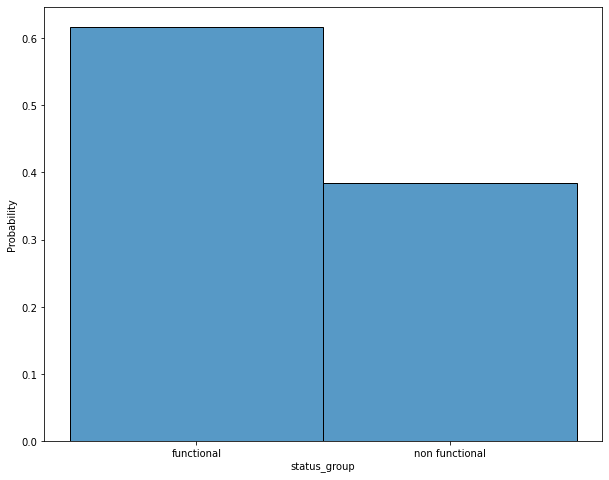

In [204]:
fig, ax = plt.subplots(figsize=(10,8))

ax = sns.histplot(df3['status_group'], stat='probability')

#x=list(df3['status_group'].value_counts().index), y=list(df3['status_group'].value_counts(normalize=True))


In [13]:
df['scheme_management']

0                VWC
1              Other
2                VWC
3                VWC
4                NaN
            ...     
59395    Water Board
59396            VWC
59397            VWC
59398            VWC
59399            VWC
Name: scheme_management, Length: 59400, dtype: object

In [14]:


df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [16]:
df['year'] = df['date_recorded'].str[:4].astype(int)

df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group,year
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional,2011
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional,2013
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional,2013
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional,2013
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional,2011


In [17]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group,year
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional,2011
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional,2013
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional,2013
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional,2013
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional,2011


In [18]:
#df['construction_year'] = df['construction_year'].map(lambda x: np.nan if x == 0 else x)

In [19]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group,year
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional,2011
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional,2013
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional,2013
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional,2013
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional,2011


In [22]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [23]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [24]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [25]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group,year
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional,2011
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional,2013
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional,2013
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional,2013
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional,2011


In [26]:
df.drop(['wpt_name', 
         'recorded_by',  
         'date_recorded', 
         'id',
         'num_private', 
         'scheme_name', 
         'waterpoint_type_group', 
         'extraction_type_group', 
         'extraction_type_class', 
         'source_type', 
         'region', 
         'subvillage', 
         'ward', 
         'lga', 
         'management_group', 
         'payment_type', 
         'quantity_group',
         'public_meeting',
         'funder',
         'installer'], axis=1, inplace=True)

df.head()

,amount_tsh,gps_height,longitude,latitude,basin,region_code,district_code,population,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group,year
0,6000.0,1390,34.938093,-9.856322,Lake Nyasa,11,5,109,VWC,False,1999,gravity,vwc,pay annually,soft,good,enough,spring,groundwater,communal standpipe,functional,2011
1,0.0,1399,34.698766,-2.147466,Lake Victoria,20,2,280,Other,True,2010,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,2013
2,25.0,686,37.460664,-3.821329,Pangani,21,4,250,VWC,True,2009,gravity,vwc,pay per bucket,soft,good,enough,dam,surface,communal standpipe multiple,functional,2013
3,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,58,VWC,True,1986,submersible,vwc,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional,2013
4,0.0,0,31.130847,-1.825359,Lake Victoria,18,1,0,NaN,True,0,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,functional,2011


In [27]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59400 non-null  float64
 1   gps_height         59400 non-null  int64  
 2   longitude          59400 non-null  float64
 3   latitude           59400 non-null  float64
 4   basin              59400 non-null  object 
 5   region_code        59400 non-null  int64  
 6   district_code      59400 non-null  int64  
 7   population         59400 non-null  int64  
 8   scheme_management  55523 non-null  object 
 9   permit             56344 non-null  object 
 10  construction_year  59400 non-null  int64  
 11  extraction_type    59400 non-null  object 
 12  management         59400 non-null  object 
 13  payment            59400 non-null  object 
 14  water_quality      59400 non-null  object 
 15  quality_group      59400 non-null  object 
 16  quantity           594

In [29]:
df.fillna('unknown', inplace=True)

In [30]:
df['permit'] = df['permit'].astype(str)

In [31]:
df.shape

(59400, 22)

In [32]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [33]:
X = df.drop('status_group', axis=1)
y = df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, stratify=y)

In [34]:
y_train = y_train.map({'non functional': 1, 'functional needs repair': 0, 'functional': 0})

In [172]:
y_test = y_test.map({'non functional': 1, 'functional needs repair': 0, 'functional': 0})

In [35]:
c_year_median = X_train[X_train['construction_year'] != 0]['construction_year'].median()

In [173]:
c_year_median_test = X_test[X_test['construction_year'] != 0]['construction_year'].median()

In [36]:
X_train['construction_year'] = X_train['construction_year'].map(lambda x: c_year_median if x == 0 else x)

<ipython-input-36-880ada5a2ca3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['construction_year'] = X_train['construction_year'].map(lambda x: c_year_median if x == 0 else x)


In [174]:
X_test['construction_year'] = X_test['construction_year'].map(lambda x: c_year_median_test if x == 0 else x)

<ipython-input-174-b40253569684>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['construction_year'] = X_test['construction_year'].map(lambda x: c_year_median_test if x == 0 else x)


In [37]:
X_train.loc[(X_train['construction_year'] > X_train['year']),'construction_year'] = c_year_median

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [175]:
X_test.loc[(X_test['construction_year'] > X_test['year']),'construction_year'] = c_year_median_test

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [38]:
X_train['age'] = X_train['year'] - X_train['construction_year']

<ipython-input-38-16b4e26de6e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['age'] = X_train['year'] - X_train['construction_year']


In [176]:
X_test['age'] = X_test['year'] - X_test['construction_year']

<ipython-input-176-dae22c5a2b6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['age'] = X_test['year'] - X_test['construction_year']


In [39]:
X_train.drop(['construction_year', 'year'], axis=1, inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [177]:
X_test.drop(['construction_year', 'year'], axis=1, inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent', random_state=42)

dummy.fit(X_train, y_train)

y_pred = dummy.predict(X_train)

accuracy_score(y_train, y_pred)

0.6157575757575757

In [41]:
X_train_nums = X_train.select_dtypes(exclude=['object'])

X_train_cat = X_train.select_dtypes('object')

In [171]:
trans = ColumnTransformer(transformers=[('ohe', OneHotEncoder(handle_unknown='ignore'), X_train_cat.columns)],
remainder='passthrough')

In [43]:
model_pipe = Pipeline(steps=[
    ('trans', trans),
    ('rfc', RandomForestClassifier(random_state=42))
])


In [44]:
grid = [{'rfc__n_estimators':[100],
         'rfc__criterion':['gini', 'entropy'],
         'rfc__max_depth':[None,3,5],
         'rfc__min_samples_split':[2,5,10],
         'rfc__min_samples_leaf':[1,3,5,7]}]

In [45]:
gs_pipe = GridSearchCV(estimator=model_pipe, param_grid=grid, cv=3, return_train_score=True)

In [45]:
gs_pipe.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['basin', 'scheme_management', 'permit', 'extraction_type', 'management',
       'payment', 'water_quality', 'quality_group', 'quantity', 'source',
       'source_class', 'waterpoint_type'],
      dtype='object'))])),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             param_grid=[{'rfc__criterion': ['gini', 'entropy'],
                          'rfc__max_depth': [None, 3, 5],
                          'rfc__min_samples_leaf': [1, 3, 5, 7],
                          'rfc__min_samp

In [46]:
gs_pipe.best_params_

{'rfc__criterion': 'entropy',
 'rfc__max_depth': None,
 'rfc__min_samples_leaf': 1,
 'rfc__min_samples_split': 10,
 'rfc__n_estimators': 100}

In [47]:
gs_pipe.cv_results_['mean_train_score'].mean()

0.8123185559296671

In [48]:
gs_pipe.cv_results_['mean_test_score'].mean()

0.7935546826287568

In [ ]:
#gs_pipe.score(X_test, y_test)

In [46]:
grid2 = [{'rfc__n_estimators':[1000],
         'rfc__criterion':['entropy'],
         'rfc__max_depth':[None],
         'rfc__min_samples_split':[10],
         'rfc__min_samples_leaf':[1]}]

In [47]:
gs_pipe2 = GridSearchCV(estimator=model_pipe, param_grid=grid2, cv=3, return_train_score=True)

In [51]:
gs_pipe2.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['basin', 'scheme_management', 'permit', 'extraction_type', 'management',
       'payment', 'water_quality', 'quality_group', 'quantity', 'source',
       'source_class', 'waterpoint_type'],
      dtype='object'))])),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             param_grid=[{'rfc__criterion': ['entropy'],
                          'rfc__max_depth': [None],
                          'rfc__min_samples_leaf': [1],
                          'rfc__min_samples_split': [10],
     

In [52]:
gs_pipe2.best_params_

{'rfc__criterion': 'entropy',
 'rfc__max_depth': None,
 'rfc__min_samples_leaf': 1,
 'rfc__min_samples_split': 10,
 'rfc__n_estimators': 1000}

In [53]:
gs_pipe2.cv_results_['mean_train_score'].mean()

0.9334231200897868

In [54]:
gs_pipe2.cv_results_['mean_test_score'].mean()

0.8528843995510661

In [ ]:
#gs_pipe2.score(X_test, y_test)

In [48]:
grid3 = [{'rfc__n_estimators':[1000],
         'rfc__criterion':['entropy'],
         'rfc__max_depth':[None],
         'rfc__min_samples_split':[10],
         'rfc__min_samples_leaf':[1],
         'rfc__max_features':[3,5,10]}]

In [49]:
gs_pipe3 = GridSearchCV(estimator=model_pipe, param_grid=grid3, cv=3, return_train_score=True)

In [57]:
gs_pipe3.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['basin', 'scheme_management', 'permit', 'extraction_type', 'management',
       'payment', 'water_quality', 'quality_group', 'quantity', 'source',
       'source_class', 'waterpoint_type'],
      dtype='object'))])),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             param_grid=[{'rfc__criterion': ['entropy'],
                          'rfc__max_depth': [None],
                          'rfc__max_features': [3, 5, 10],
                          'rfc__min_samples_leaf': [1],
    

In [58]:
gs_pipe3.best_params_

{'rfc__criterion': 'entropy',
 'rfc__max_depth': None,
 'rfc__max_features': 10,
 'rfc__min_samples_leaf': 1,
 'rfc__min_samples_split': 10,
 'rfc__n_estimators': 1000}

In [59]:
gs_pipe3.cv_results_['mean_train_score'].mean()

0.9289749345304902

In [60]:
gs_pipe3.cv_results_['mean_test_score'].mean()

0.8515375982042648

In [ ]:
#gs_pipe3.score(X_test, y_test)

In [222]:
import xgboost as xgb

In [223]:
xgb_model = xgb.XGBClassifier(random_state=42)

In [52]:
xgb_pipe = Pipeline(steps=[('trans',trans),
                           ('xgb_model', xgb_model)])

In [53]:
xgb_grid = {'xgb_model__n_estimators':[10, 50,100],
            'xgb_model__max_depth':[1,2,3,5]}

In [54]:
gs_xgb = GridSearchCV(estimator=xgb_pipe, param_grid=xgb_grid, cv=3, return_train_score=True)

In [66]:
gs_xgb.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['basin', 'scheme_management', 'permit', 'extraction_type', 'management',
       'payment', 'water_quality', 'quality_group', 'quantity', 'source',
       'source_class', 'waterpoint_type'],
      dtype='object'))])),
                                       ('xg...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
               

In [67]:
gs_xgb.best_params_

{'xgb_model__max_depth': 5, 'xgb_model__n_estimators': 100}

In [68]:
gs_xgb.cv_results_['mean_train_score'].mean()

0.8054087167976057

In [69]:
gs_xgb.cv_results_['mean_test_score'].mean()

0.7987822671156004

In [55]:
xgb_grid2 = {'xgb_model__n_estimators':[200,225,250,275],
            'xgb_model__max_depth':[4,5,6]}

In [56]:
gs_xgb2 = GridSearchCV(estimator=xgb_pipe, param_grid=xgb_grid2, cv=3, return_train_score=True)

In [57]:
gs_xgb2.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['basin', 'scheme_management', 'permit', 'extraction_type', 'management',
       'payment', 'water_quality', 'quality_group', 'quantity', 'source',
       'source_class', 'waterpoint_type'],
      dtype='object'))])),
                                       ('xg...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
               

In [58]:
gs_xgb2.best_params_

{'xgb_model__max_depth': 6, 'xgb_model__n_estimators': 225}

In [59]:
gs_xgb2.cv_results_['mean_train_score'].mean()

0.9029227459783015

In [60]:
gs_xgb2.cv_results_['mean_test_score'].mean()

0.8423625140291806

In [61]:
df = pd.DataFrame({'Features':gs_xgb2.best_estimator_.fit(X_train, y_train)[1].feature_importances_})
df

,Features
0,0.004610
1,0.023721
2,0.012328
3,0.002799
4,0.002054
...,...
104,0.003846
105,0.008136
106,0.006071
107,0.003466


In [62]:
df[df['Features']>0.03]

,Features
34,0.034138
76,0.265173
100,0.132252


In [65]:
best_model = gs_xgb2.best_estimator_.fit(X_train, y_train)

In [ ]:
best_model_test = gs_xgb2.best_estimator_.fit(X_test, y_test)

In [114]:
ohe_cols = list(best_model.named_steps['trans'].transformers_[0][1].get_feature_names(X_train_cat.columns))

In [116]:
col_names = ohe_cols + list(X_train_nums.columns)

In [167]:
#col_names

In [123]:
df['feature_names'] = col_names

In [151]:
df_top_important

,Features,feature_names
1,0.023721,basin_Lake Nyasa
28,0.020400,extraction_type_gravity
34,0.034138,extraction_type_other
76,0.265173,quantity_dry
100,0.132252,waterpoint_type_other


In [155]:
df_top_important = df[df['Features']>0.02]
features_sorted = sorted(df_top_important['Features'], reverse=True)

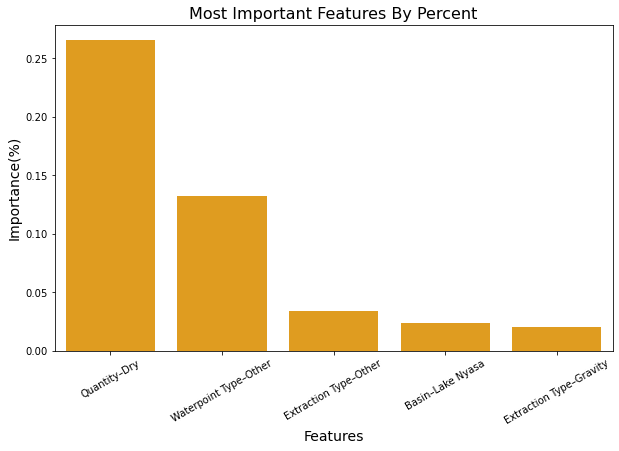

In [205]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(x=[
               'Quantity–Dry', 
               'Waterpoint Type–Other',
               'Extraction Type–Other',
               'Basin–Lake Nyasa', 
               'Extraction Type–Gravity'], 
                y=features_sorted, color='orange')

ax.set_title('Most Important Features By Percent', fontsize=16)
ax.set_ylabel('Importance(%)', fontsize=14)
ax.set_xlabel('Features', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.savefig('feature_importances');


In [168]:
xgb_model2 = xgb.XGBClassifier(n_estimators=225, max_depth=6,random_state=42)

In [169]:
xgb_pipe2 = Pipeline(steps=[('trans',trans),
                           ('xgb_model', xgb_model2)])

In [179]:
xgb_pipe2.fit(X_train, y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['basin', 'scheme_management', 'permit', 'extraction_type', 'management',
       'payment', 'water_quality', 'quality_group', 'quantity', 'source',
       'source_class', 'waterpoint_type'],
      dtype='object'))])),
                ('xgb_model',
                 XGBClassifier(base_...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=225,
         

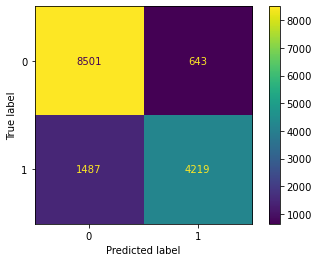

In [180]:
plot_confusion_matrix(xgb_pipe2, X_test, y_test)

In [ ]:
lr = LogisticRegression(C = 1, class_weight = None, max_iter = 1750, tol = 0.0001)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 11, weights = 'distance')

In [ ]:
rfc = RandomForestClassifier(n_estimators=1000,criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=10, max_features=10, random_state=42)

In [ ]:
trans2 = ColumnTransformer(transformers=[('ohe', OneHotEncoder(handle_unknown='ignore'), X_train_cat.columns), 
                                         ('ss', StandardScaler(), X_train_nums.columns)],
remainder='passthrough')

In [ ]:
model_pipe2 = Pipeline(steps=[
    ('trans2', trans2),
    ('knn',knn)
])


In [ ]:
model_pipe3 = Pipeline(steps=[
    ('trans2', trans2),
    ('lr', lr)
])

In [ ]:
model_pipe4 = Pipeline(steps=[
    ('trans', trans),
    ('rfc', rfc)
])

In [ ]:
vc = VotingClassifier(estimators=[('knn', model_pipe2), 
                                  ('lr', model_pipe3), 
                                  ('rfc', model_pipe4), 
                                  ('xgb', xgb_pipe)], 
                                  weights=[0.1,0.1,0.7, 0.1])

In [ ]:
#vc.fit(X_train, y_train)

In [ ]:
vc_grid = {'voting':['hard','soft']}

In [ ]:
gs_vc = GridSearchCV(vc, vc_grid, cv=3, return_train_score=True)

In [ ]:
gs_vc.fit(X_train, y_train)

In [ ]:
gs_vc.best_params_

In [ ]:
gs_vc.cv_results_['mean_train_score'].mean()

In [ ]:
gs_vc.cv_results_['mean_test_score'].mean()

In [ ]:
vc2 = VotingClassifier(estimators=[('knn', model_pipe2), 
                                  ('lr', model_pipe3), 
                                  ('rfc', model_pipe4), 
                                  ('xgb', xgb_pipe2)],
                                  voting='soft',
                                  weights=[0.15,0.15,0.5, 0.2])

In [ ]:
cv = cross_validate(vc2, X_train, y_train, cv=3, scoring='accuracy', return_train_score=True)

In [ ]:
cv['test_score'].mean()

In [ ]:
cv['train_score'].mean()

In [ ]:
vc2.fit(X_train, y_train)

In [ ]:
vc.score(X_test, y_test)

In [ ]:
plot_confusion_matrix(vc, X_test, y_test)

In [ ]:
y_pred = vc.predict(X_test)

In [ ]:
def metrics(y_test,y_preds):
    return print(f'''Recall Score: {recall_score(y_test,y_preds)}
Precision Score: {precision_score(y_test,y_preds)}
Accuracy Score:{accuracy_score(y_test,y_preds)}
F1 Score: {f1_score(y_test,y_preds)}
Matrix:{confusion_matrix(y_test,y_preds)}''')

In [ ]:
metrics(y_test, y_pred)